<a href="https://colab.research.google.com/github/amplabs-ai/amplabs/blob/main/MRS_Sandia_AmpLabs_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MRS - Sandia AmpLabs Example 1





In this demo you will learn how to:

1. Fetch battery data from **AmpLabs JSON API**
2. Create new metrics and add them as new columns using **Pandas**
3. Plot graphs using **Plotly**


We will use the following Python libraries and tools

**Pandas** is an easy-to-use data structures and data analysis tools for the Python programming language. In Pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc. When working with tabular data, such as data stored in spreadsheets or databases, pandas will help you to explore, clean, and process your data. In pandas, a data table is called a **Data Frame**.

Note: Pandas is built off of another library called **NumPy**. 

**Plotly** The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. Kaleido is a library for generating static images used in conjunction with Plotly



In [ ]:
# Download python packages to your system using pip install
import sys
!{sys.executable} -m pip install pandas plotly kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 120 kB/s 


Import the libraries we downloaded into the Python environment


In [ ]:
# Useful for fetching data from the web 

import json
import urllib.error
import urllib.request

# PyData Libraries

import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import kaleido

# Library useful for rendering Images and suppressing warnings in Jupyter Notebooks

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

After uploading data to https://www.amplabs.ai we will build functions that will help us fetch, manipulate and plot our data

# **1. Fetch Data from AmpLabs JSON API**


# Key Terms

**API** Application Programming Interface is a set of definitions and protocols for building and integrating application software. AmpLabs provides an API to help you access and control your data.

**JavaScript Object Notation** is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. Win/Win

[JSON](https://www.json.org/json-en.html) is commonly used as an output format from websites. AmpLabs provides a JSON API for your Battery Data. Records for your battery data look like the following: 

``` JSON
{
  "detail": "Records Retrieved", 
  "records": [
    {
      "Charge_Capacity (Ah)": 2.563, 
      "Charge_Energy (Wh)": 10.029, 
      "Cycle_Index": 1, 
      "Discharge_Capacity (Ah)": 2.709, 
      "Discharge_Energy (Wh)": 9.424, 
      "End_Time": null, 
      "Max_Current (A)": 1.496, 
      "Max_Voltage (V)": 4.2, 
      "Min_Current (A)": -1.503, 
      "Min_Voltage (V)": 1.999, 
      "Start_Time": null, 
      "Test_Time (s)": 14644.703
    },
    "status": 200
}
```

**Data Frame**. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
[Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)



``` Python
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
```





# Define Helper Function

The following section defines a function that will fetch data from the AmpLabs JSON API and returns the JSON response for further processing.

In [ ]:
def get_amplabs_cycledata(user_token, cell_id):
    url = "http://www.amplabs.ai/download/cells/cycle_data_json?cell_id={}".format(cell_id.replace('/','%2F'))
    httprequest = urllib.request.Request( url, method="GET")
    httprequest.add_header("Authorization", "Bearer {}".format(user_token))
    try:
        with urllib.request.urlopen(httprequest) as httpresponse:
          response = json.loads(httpresponse.read())
          return response, 1
    except urllib.error.HTTPError as e:
        print(e)
    return None, 0

New Native Python function: **enumerate**

When iterating through an array in python, you may need to keep track of the index in the list and the value at that index. If you have trouble recalling whether the index starts at 0 or 1, you can use enumerate to handle the complexity. By inputting a list, enumerate returns an iterator that produces 2 values per iteration:
1) the current index 
2) value of the list at that iteration

Now there is no need to worry about off-by-one errors involving list indexing and for loops.



# Fetch Data

In [ ]:
#Bearer Token
user_token = '<token>' 

cell_ids = ['SNL_18650_NMC_15C_0-100_0.5/1C_a',
            'SNL_18650_NMC_25C_0-100_0.5/1C_a',
            'SNL_18650_NMC_35C_0-100_0.5/1C_a']

In [ ]:
dfs = {}
for idx, cell_id in enumerate(cell_ids): 
  print("Fetching {}...".format(cell_id), end = '')
  response, status = get_amplabs_cycledata(user_token, cell_id) # Fetch Cycle Data from AmpLabs JSON API
  print(response)
  output = pd.DataFrame(response['records'][0])  # Convert JSON Records to DataFrame
  output = output.set_index(output['Cycle_Index']) # Change DataFrame index to Cycle Index
  dfs[cell_id] = output.head(500) # Take the first 500 rows and put into a dictionary
  print("done.")

Fetching SNL_18650_NMC_15C_0-100_0.5/1C_a...{'detail': 'Records Retrieved', 'records': [[{'Charge_Capacity (Ah)': 2.559, 'Charge_Energy (Wh)': 10.015, 'Cycle_Index': 1, 'Discharge_Capacity (Ah)': 2.697, 'Discharge_Energy (Wh)': 9.4, 'End_Time': None, 'Max_Current (A)': 1.496, 'Max_Voltage (V)': 4.2, 'Min_Current (A)': -1.503, 'Min_Voltage (V)': 1.999, 'Start_Time': None, 'Test_Time (s)': 14644.703}, {'Charge_Capacity (Ah)': 2.701, 'Charge_Energy (Wh)': 10.485, 'Cycle_Index': 2, 'Discharge_Capacity (Ah)': 2.697, 'Discharge_Energy (Wh)': 9.408, 'End_Time': None, 'Max_Current (A)': 1.496, 'Max_Voltage (V)': 4.2, 'Min_Current (A)': -1.503, 'Min_Voltage (V)': 1.999, 'Start_Time': None, 'Test_Time (s)': 29574.64}, {'Charge_Capacity (Ah)': 2.697, 'Charge_Energy (Wh)': 10.466, 'Cycle_Index': 3, 'Discharge_Capacity (Ah)': 2.691, 'Discharge_Energy (Wh)': 9.392, 'End_Time': None, 'Max_Current (A)': 1.496, 'Max_Voltage (V)': 4.2, 'Min_Current (A)': -1.503, 'Min_Voltage (V)': 1.999, 'Start_Time': N

In [ ]:
print(dfs['SNL_18650_NMC_15C_0-100_0.5/1C_a'].shape)
dfs['SNL_18650_NMC_15C_0-100_0.5/1C_a'].head()

(500, 12)


,Charge_Capacity (Ah),Charge_Energy (Wh),Cycle_Index,Discharge_Capacity (Ah),Discharge_Energy (Wh),End_Time,Max_Current (A),Max_Voltage (V),Min_Current (A),Min_Voltage (V),Start_Time,Test_Time (s)
Cycle_Index,,,,,,,,,,,,
1,2.559,10.015,1,2.697,9.400,None,1.496,4.2,-1.503,1.999,None,14644.703
2,2.701,10.485,2,2.697,9.408,None,1.496,4.2,-1.503,1.999,None,29574.640
3,2.697,10.466,3,2.691,9.392,None,1.496,4.2,-1.503,1.999,None,44480.050
4,5.359,20.802,4,5.331,17.928,None,1.496,4.2,-3.003,1.998,None,67105.681
5,2.661,10.316,5,2.652,8.927,None,1.496,4.2,-3.003,1.999,None,78058.660


In [ ]:
print(dfs['SNL_18650_NMC_25C_0-100_0.5/1C_a'].shape)
dfs['SNL_18650_NMC_25C_0-100_0.5/1C_a'].head()

(500, 12)


,Charge_Capacity (Ah),Charge_Energy (Wh),Cycle_Index,Discharge_Capacity (Ah),Discharge_Energy (Wh),End_Time,Max_Current (A),Max_Voltage (V),Min_Current (A),Min_Voltage (V),Start_Time,Test_Time (s)
Cycle_Index,,,,,,,,,,,,
1,2.882,11.085,1,2.967,10.636,None,1.499,4.2,-1.500,1.999,None,16440.748
2,2.968,11.349,2,2.960,10.622,None,1.499,4.2,-1.500,1.999,None,33025.016
3,2.960,11.318,3,2.952,10.601,None,1.499,4.2,-1.500,1.999,None,49576.340
4,5.881,22.497,4,5.847,20.609,None,1.499,4.2,-3.000,1.999,None,74830.624
5,2.919,11.164,5,2.910,10.265,None,1.499,4.2,-2.999,1.999,None,87092.129


In [ ]:
print(dfs['SNL_18650_NMC_35C_0-100_0.5/1C_a'].shape)
dfs['SNL_18650_NMC_35C_0-100_0.5/1C_a'].head()

(500, 12)


,Charge_Capacity (Ah),Charge_Energy (Wh),Cycle_Index,Discharge_Capacity (Ah),Discharge_Energy (Wh),End_Time,Max_Current (A),Max_Voltage (V),Min_Current (A),Min_Voltage (V),Start_Time,Test_Time (s)
Cycle_Index,,,,,,,,,,,,
1,2.863,11.098,1,2.963,10.484,None,1.5,4.2,-1.5,1.999,None,15998.063
2,2.970,11.427,2,2.953,10.465,None,1.5,4.2,-1.5,1.999,None,32178.926
3,2.958,11.383,3,2.943,10.439,None,1.5,4.2,-1.5,1.999,None,48308.656
4,5.861,22.580,4,5.819,19.995,None,1.5,4.2,-3.0,1.999,None,72679.453
5,2.906,11.192,5,2.892,9.955,None,1.5,4.2,-3.0,1.999,None,84483.639


# Plot Energy Throughput Histogram


We define a new function that we will use to generate our energy histogram and write to file.

In [ ]:
def write_energy_throughput_histogram_to_file(df, filename):
  df['Discharge_Energy (Wh)'] = pd.to_numeric(df['Discharge_Energy (Wh)'])
  fig = px.histogram(df, 
                     x='cell_id', 
                     y='Discharge_Energy (Wh)', 
                     color='cell_id', 
                     labels={ 
                         'cell_id': 'Cell', 
                         'Discharge_Energy (Wh)': 'Discharge Energy Throughput, 500 cyc (Wh)'
                         })
  pio.write_image(fig, file=filename, format='png', width=1200, height=800)
  print("./Discharge_energy_throughput_histogram.png updated")

Loop through each cell in the cell_id list, concat, and produce the histogram

In [ ]:
df = pd.DataFrame()

for cell_id in cell_ids:
  data = dfs[cell_id]
  data['cell_id'] = [cell_id] * len(data) # Add cell_id as a column to DataFrame in order for it to appear on plot
  df = pd.concat([df, data])

write_energy_throughput_histogram_to_file(df, './Discharge_energy_throughput_histogram.png')

./Discharge_energy_throughput_histogram.png updated


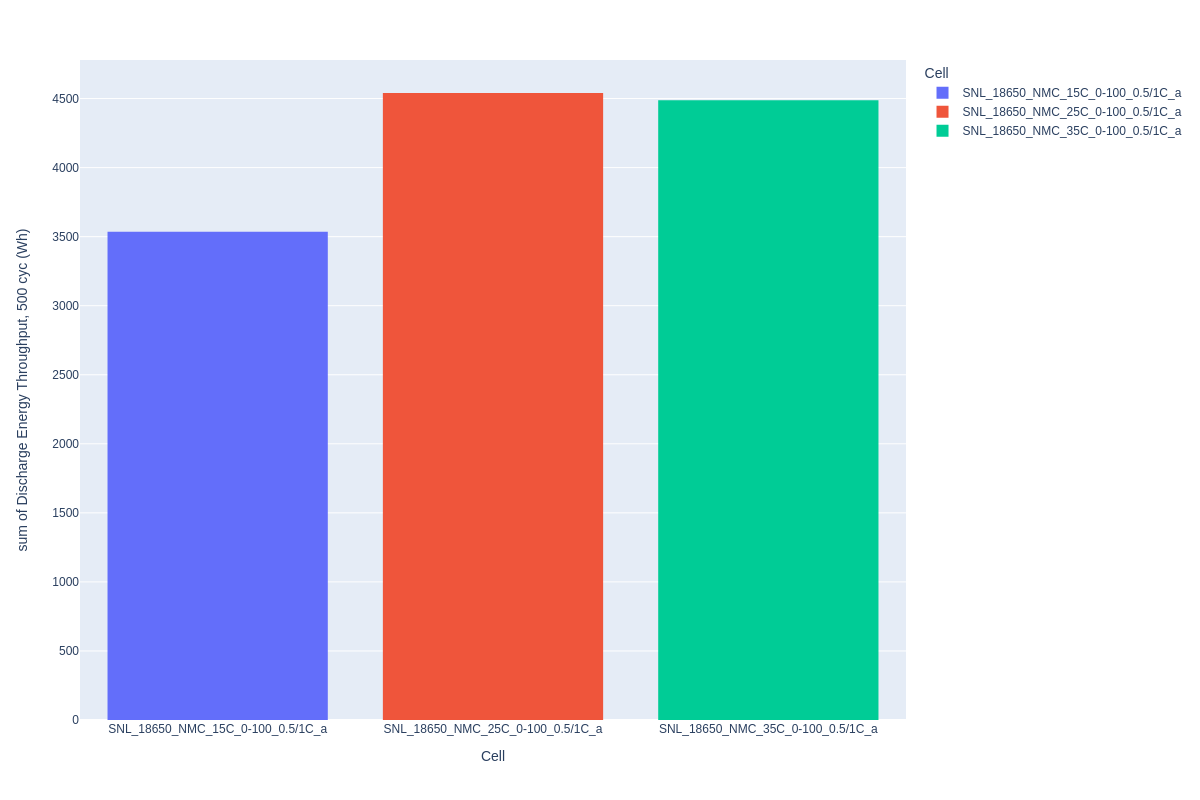

In [ ]:
Image(filename='Discharge_energy_throughput_histogram.png') 

# Plot Energy Throughput Line Graphs

 We define a new function that we will use to 
generate our energy throughput linegraphs and write them to file.

In [ ]:
def write_energy_throughput_linegraph_to_file(df, filename):
    fig = px.line(df, 
                  x='Cycle_Index', 
                  y=[
                     'Discharge Energy Throughput (Wh)', 
                     'Charge Energy Throughput (Wh)'
                     ], 
                  labels={
                      'Cycle_Index': 'Cycle'
                      })
    fig.update_traces(mode='markers+lines')
    pio.write_image(fig, file=filename, format='png', width=1200, height=800)
    print("./{} updated".format(filename)) 

If we want to graph Energy Throughput given our original schema we see throughput can be derived by taking the cumulative sum of Charge and Discharge Energy accordingly. With pandas this is made trivial with the cumulative sum function, **cumsum()**.

**Original Schema**
1. Cycle_Index	
2. Test_Time (s)
3. Start_Time
4. End_Time
5. Charge_Capacity (Ah)	
6. Charge_Energy (Wh)	
7. Discharge_Capacity (Ah)	
8. Discharge_Energy (Wh)	
9. Max_Current (A)	
10. Max_Voltage (V)	
11. Min_Current (A)	
12. Min_Voltage (V)
	


In [ ]:
for cell_id in cell_ids:
  dfs[cell_id]['Discharge Energy Throughput (Wh)'] = dfs[cell_id]['Discharge_Energy (Wh)'].cumsum() # create new column called Discharge Energy Throughput (Wh) to be the cumulative sum of Discharge Energy
  dfs[cell_id]['Charge Energy Throughput (Wh)'] = dfs[cell_id]['Charge_Energy (Wh)'].cumsum() # create new column called Charge Energy Throughput (Wh) to be the cumulative sum of Charge Energy
  filename = 'Energy_throughput_' + cell_id.replace('/','-') + '.png'
  write_energy_throughput_linegraph_to_file(dfs[cell_id], filename)


./Energy_throughput_SNL_18650_NMC_15C_0-100_0.5-1C_a.png updated
./Energy_throughput_SNL_18650_NMC_25C_0-100_0.5-1C_a.png updated
./Energy_throughput_SNL_18650_NMC_35C_0-100_0.5-1C_a.png updated


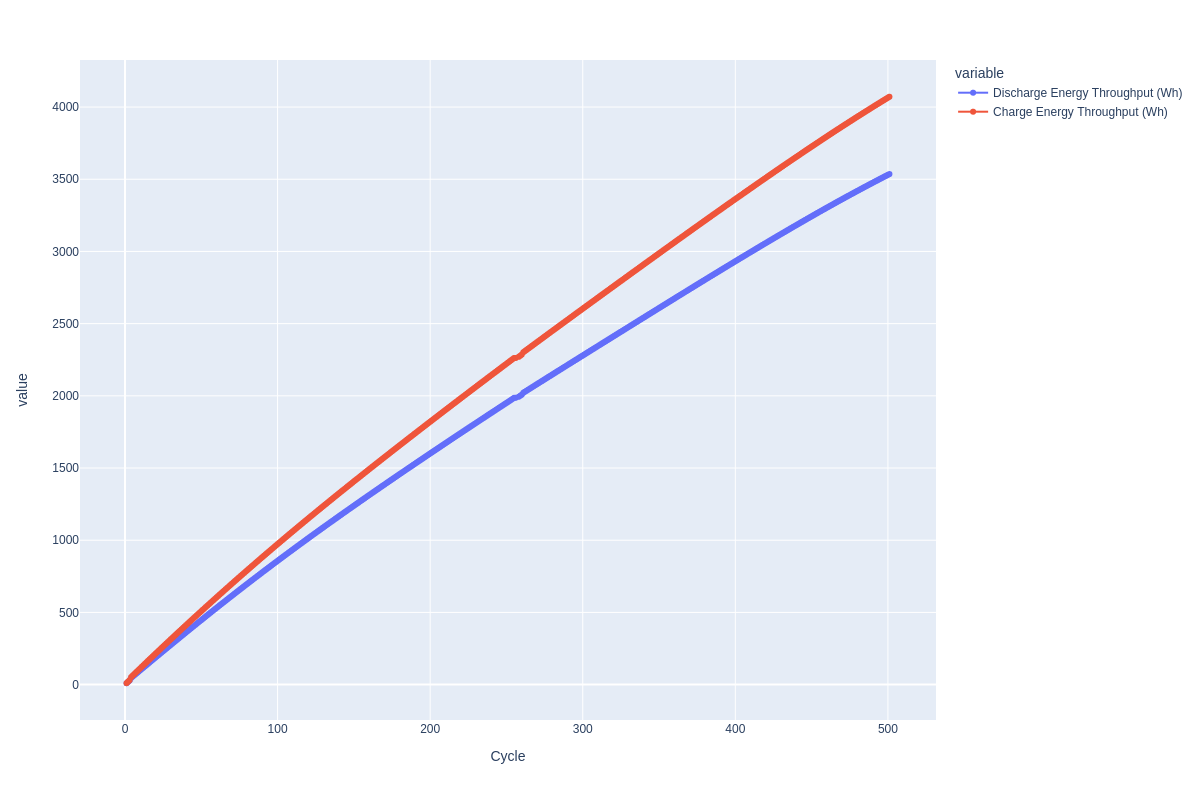

In [ ]:
Image(filename='Energy_throughput_SNL_18650_NMC_15C_0-100_0.5-1C_a.png')

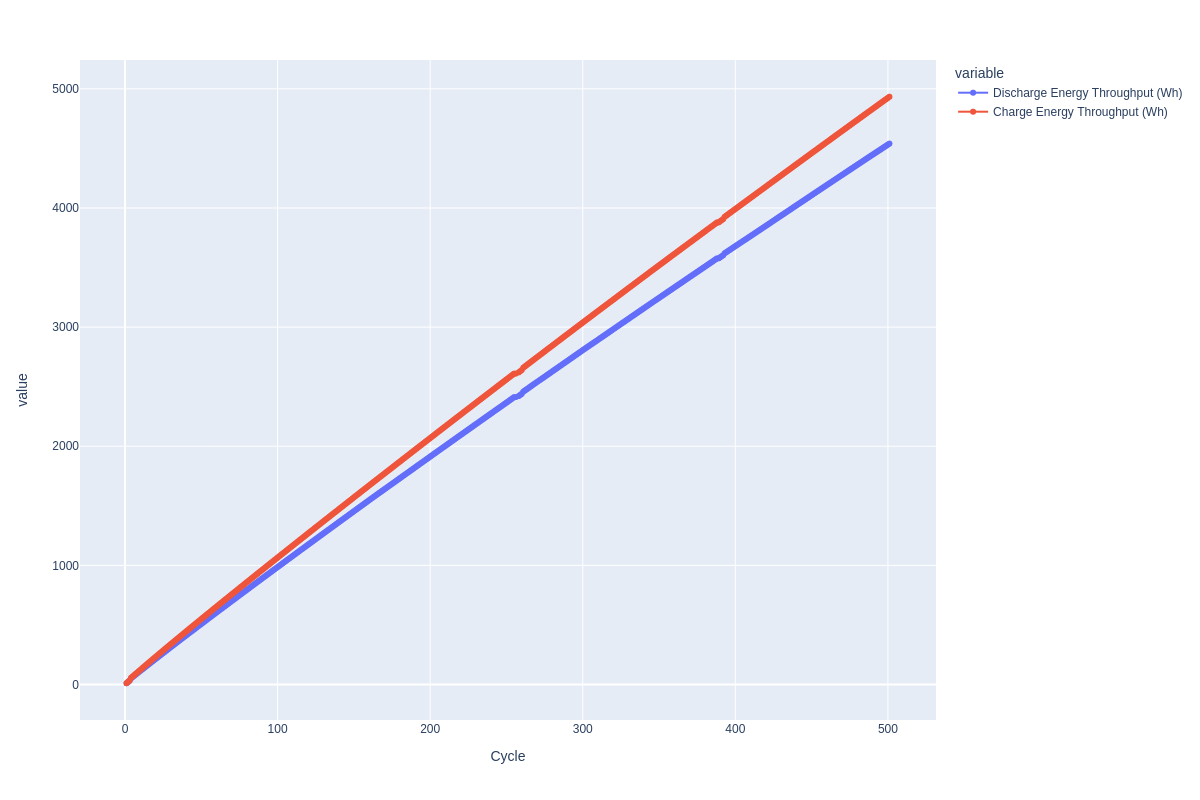

In [ ]:
Image(filename='Energy_throughput_SNL_18650_NMC_25C_0-100_0.5-1C_a.png')

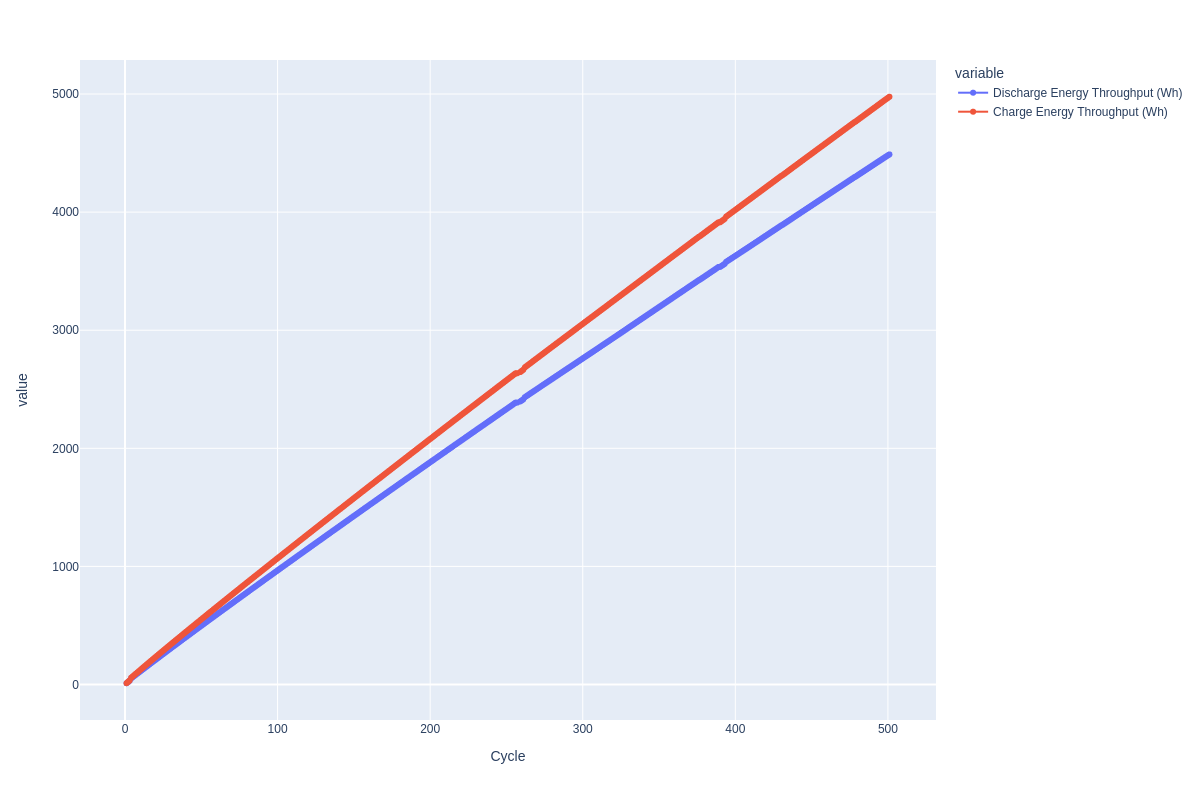

In [ ]:
Image(filename='Energy_throughput_SNL_18650_NMC_35C_0-100_0.5-1C_a.png')

# Fun with Loc-i [Optional]

Interested in learning more about Python 0 indexing and some fun ways to work around it? Check out the supplemental demo called **Fun with Loc-i**. It is useful to help build intuition about Pandas Dataframes and how data can be retrieved and manipulated by label or index.

[Fun with Loc-i](https://colab.research.google.com/drive/1Hx_miNwE17nxj0BHAIX8X28q7f4p_6G8?usp=sharing
)



In [ ]:
pdf = pd.DataFrame(data= {'colA': ["thor", 4], 'colB': ["valkyrie", 8]})
print("Data Frame:")
print(pdf)

Data Frame:
   colA      colB
0  thor  valkyrie
1     4         8


In [ ]:
pdf = pd.DataFrame(data= {'colA': ["thor", 4], 'colB': ["valkyrie", 8]} , index=["row1", "row2"])
print("Data Frame:")
print(pdf)

Data Frame:
      colA      colB
row1  thor  valkyrie
row2     4         8


In [ ]:
print("Select Row by Name:")
print(pdf.loc[["row1"]])

Select Row by Name:
      colA      colB
row1  thor  valkyrie


In [ ]:
print("Select Row by Index:")
print(pdf.iloc[[0]])

Select Row by Index:
      colA      colB
row1  thor  valkyrie
